# Materials and code to create images of the LORA paper and annex (veillonella)

In [1]:
%pylab inline
import os
os.environ["PATH"] = "/home/cokelaer/.config/damona/envs/sequana_tools/bin:" + os.environ["PATH"]


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
rcParams['figure.figsize'] = (8,8)

In [3]:
import glob
from tqdm import tqdm
from sequana import *
from sequana import FastA, FastQ
from sequana.pacbio import PacbioSubreads

In [25]:
import importlib
import utils  # your module
importlib.reload(utils)

<module 'utils' from '/home/cokelaer/Work/1_Projects/LORA/paper_LORA/utils.py'>

# Data Download

In [26]:
utils.download_veillonella_data()

m54091_180306_141024.subreads.fastq.gz already present
veillonella.ccs.fastq.gz already present


## Raw data (fastq) stats  -- information for the annex

In [27]:
f = FastQ('data/veillonella/m54091_180306_141024.subreads.fastq.gz')
ss = f.stats()
print(ss)
print(ss['sum_read_length'] / 2.1e6)

{'N': 338310, 'mean_length': np.float64(9080.340250066507), 'total_length': 3071969910, 'N50': np.int64(13005), 'L50': np.int64(91278), 'min_length': 50, 'max_length': 72253, 'mean_read_length': np.float64(9080.340250066507), 'sum_read_length': 3071969910}
1462.8428142857142


## veillonella CCS stats -- information for the annex

In [28]:
f = FastQ('data/veillonella/veillonella.ccs.fastq.gz')
ss = f.stats()
print(ss)
print(ss['sum_read_length'] / 2.1e6)

{'N': 192532, 'mean_length': np.float64(8808.654608065153), 'total_length': 1695947889, 'N50': np.int64(12848), 'L50': np.int64(49824), 'min_length': 51, 'max_length': 49679, 'mean_read_length': np.float64(8808.654608065153), 'sum_read_length': 1695947889}
807.5942328571429


## Figure in the annex

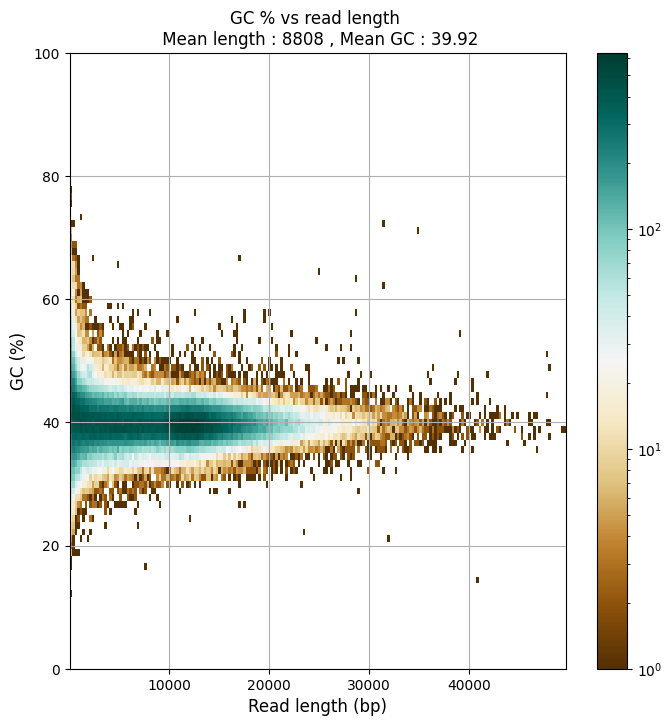

In [9]:
f.plot_GC_read_len(maxreads=200000)
utils.saveall("paper_images/veillonella/GC_vs_length")

## Repeats -- figure in the annex

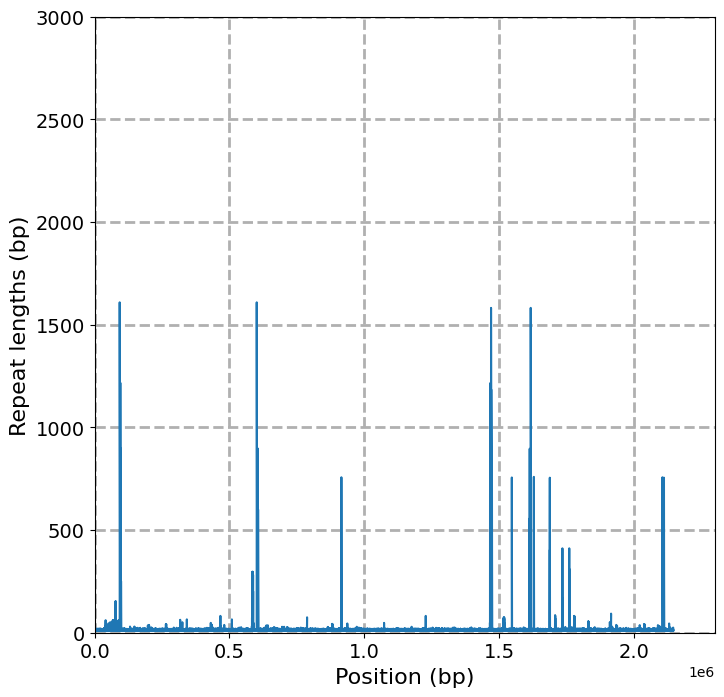

In [10]:
r = Repeats("GoldStandard/veillonella.fa")
r.threshold = 10
r.plot()
xlim([0, 2.3e6])
ylim([0,3000])
grid(True, lw=2, ls="--")
xlabel("Position (bp)", fontsize=16)
xticks(fontsize=14)
yticks(fontsize=14)
ylabel("Repeat lengths (bp)", fontsize=16)
utils.saveall("paper_images/veillonella/repeats")

# Some stats on GC and length

In [11]:
f = FastA("GoldStandard/veillonella.fa")
L = f.get_stats()['total_length']
GC = f.GC_content()
print(L, round(GC,1))

2146482 38.7


# BUSCO meta analysis for the Results section

In [12]:
bf = utils.BUSCOFactory()
assert len(bf.busco_df) == 75

0it [00:00, ?it/s]


ValueError: No objects to concatenate

In [ ]:
bf.plot_busco_summary_bar("veillonella_raw")
utils.saveall("paper_images/veillonella/busco_veillonella_raw")

bf.plot_busco_summary_bar("veillonella_ccs")
utils.saveall("paper_images/veillonella/busco_veillonella_ccs")


# Checkm meta analysis (not used but useful)

In [ ]:
cm = utils.CheckMFactory()
cm.plot_checkm_summary_bar("veillonella_ccs")
utils.saveall("paper_images/veillonella/checkm_veillonella_ccs")

cm.plot_checkm_summary_bar("veillonella_raw")
utils.saveall("paper_images/veillonella/checkm_veillonella_raw")


# STATS TABLE

In [13]:
f = FastQ("data/veillonella/m54091_180306_141024.subreads.fastq.gz")
ss = f.stats()
coverage = ss['sum_read_length'] / utils.genome_size['veillonella']
print(ss)
print(f"coverage: {coverage}")


{'N': 338310, 'mean_length': np.float64(9080.340250066507), 'total_length': 3071969910, 'N50': np.int64(13005), 'L50': np.int64(91278), 'min_length': 50, 'max_length': 72253, 'mean_read_length': np.float64(9080.340250066507), 'sum_read_length': 3071969910}
coverage: 1431.1649992872058


In [14]:
f = FastQ("data/veillonella/veillonella.ccs.fastq.gz")
ss = f.stats()
coverage = ss['sum_read_length'] / utils.genome_size['veillonella']
print(ss)
print(f"coverage: {coverage}")


{'N': 192532, 'mean_length': np.float64(8808.654608065153), 'total_length': 1695947889, 'N50': np.int64(12848), 'L50': np.int64(49824), 'min_length': 51, 'max_length': 49679, 'mean_read_length': np.float64(8808.654608065153), 'sum_read_length': 1695947889}
coverage: 790.10580521989


# table contigs

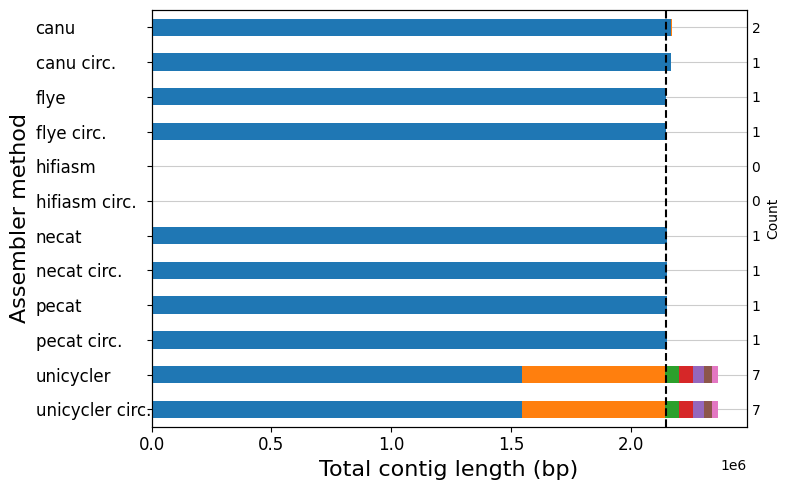

In [19]:
pl = utils.PlotContigs("veillonella_raw")
pl.plot_assembly_results()
utils.saveall("paper_images/veillonella/veillonella_raw_contigs_summary")

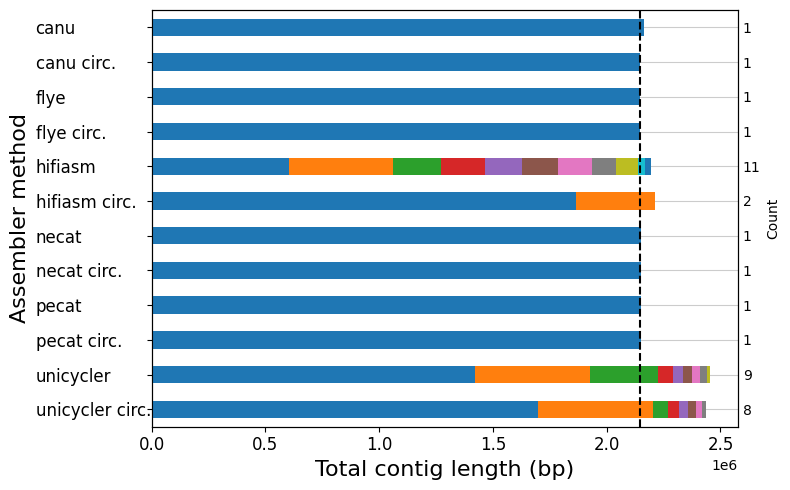

In [20]:
pl = utils.PlotContigs("veillonella_ccs")
pl.plot_assembly_results()
utils.saveall("paper_images/veillonella/veillonella_ccs_contigs_summary")
